## PROJECT SCENARIO

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## PROJECT DESCRIPTION

Customer churn refers to the number or percentage of customers who stop doing business with a company over a given period. In other words, it is the rate at which customers leave or discontinue using a company's products or services.<br />Churn can be caused by various reasons such as dissatisfaction with the product or service, competitive offerings, changes in customer needs, or external factors. Understanding and managing customer churn is important for businesses as it can have a significant impact on revenue, growth, and customer satisfaction.<br />In this project we are going to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem

## HYPOTHESIS FORMULATION

#### Null Hypothesis:
Customers who have been with the company for a longer period of time are less likely to churn than customers who have been with the company for a shorter period of time.

#### Null Hypothesis:
Customer churn does not depend on the period the Customer has been with the company.

## BUSINESS QUESTIONS

1. What is the overall churn rate for the company?
2. What are the demographics of customers who churned compared to those who did not?
3. How can the company reduce churn rate and retain more customers?

### IMPORT LIBRARIES AND LOAD DATASET

In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))

import os, pickle

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce

%matplotlib inline

<Figure size 1500x500 with 0 Axes>

In [2]:
# Load dataset
customers = pd.read_csv("Telco-Customer-Churn.csv")

# drive.mount('/content/drive')
# customers = pd.read_csv('/content/drive/MyDrive/Azubi/lp3/Customer-Churn.csv')

### EXPLORATORY DATA ANALYSIS

In [164]:
# Check the 5 sample rows of the data

pd.options.display.max_columns = None
customers.sample(5, random_state=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No


In [165]:
# Check the basic info of the data

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [166]:
# Check the shape of the data

customers.shape

(7043, 21)

There are 7043 rows and 21 columns in the data

In [167]:
# Check for null values in the data

customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the data

In [168]:
# Check for duplicated values in the data

customers.duplicated().any()

False

There are no duplicates in the data

### UNIVARIATE ANALYSIS

In [169]:
# Ananlyze the Churn column

customers["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

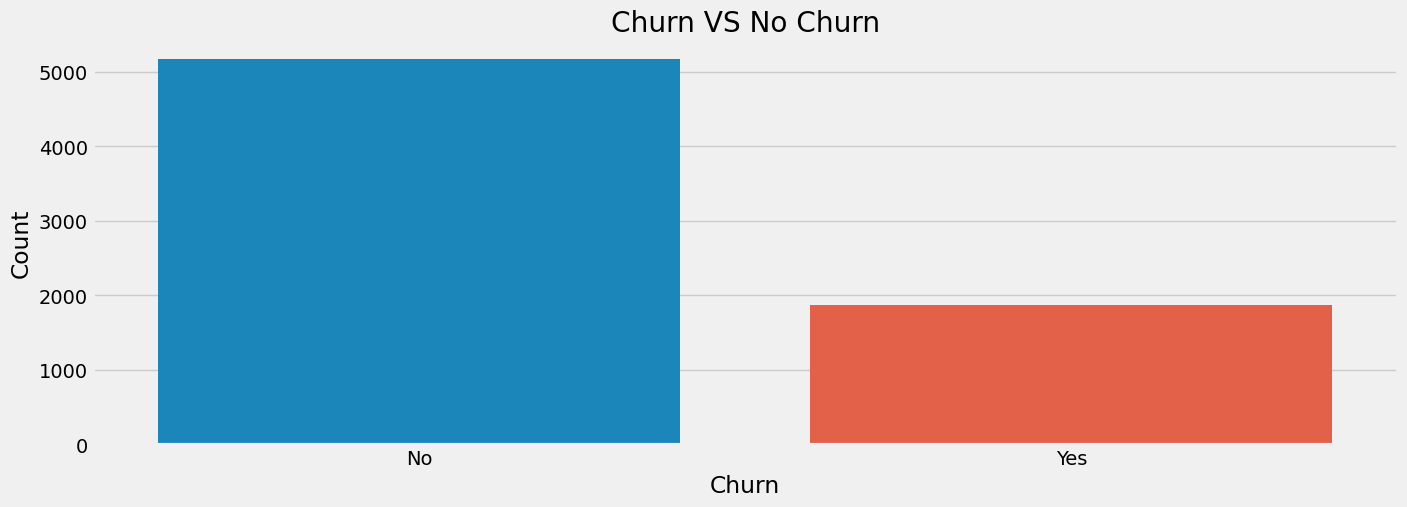

In [5]:

plt.figure(figsize=(15, 5))

sns.countplot(x='Churn', data=customers)
plt.title("Churn VS No Churn")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

From the plot,the total number of customers who churned, 5174 is more than the number of customers who did not churn, 1869.

In [171]:
# Analyze the gender of customers

customers["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

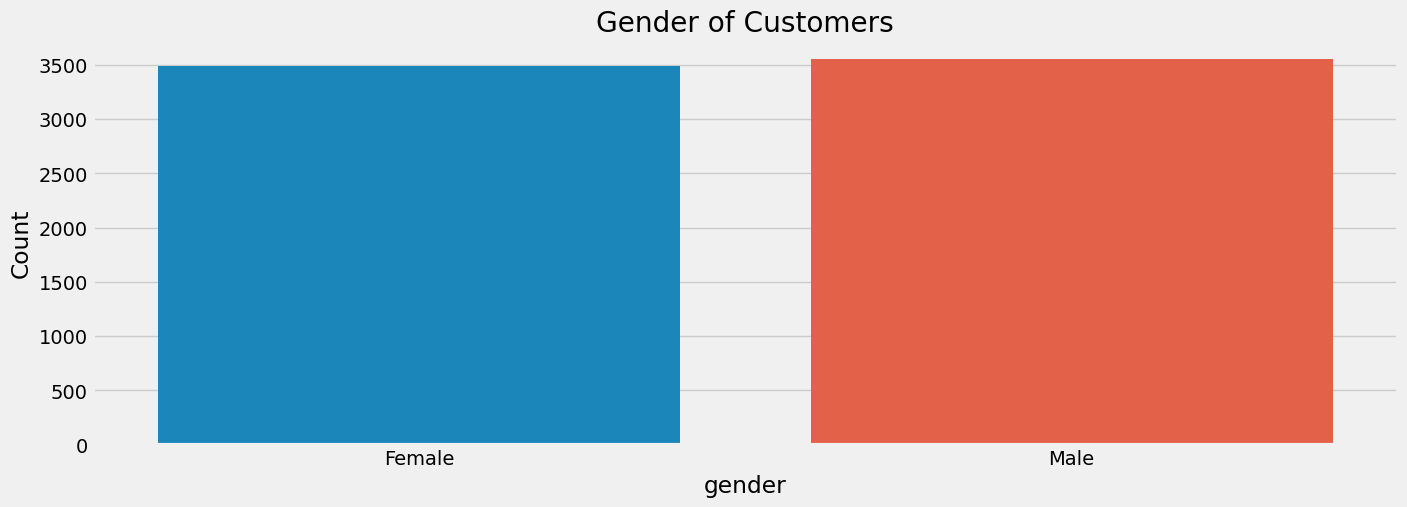

In [6]:

plt.figure(figsize=(15, 5))

sns.countplot(x='gender', data=customers)
plt.title("Gender of Customers")
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

From the plot, Female Customers were 3488, whereas Male Customers were 3555

In [173]:
# Analyze Customers who have partners and those who do not

customers["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

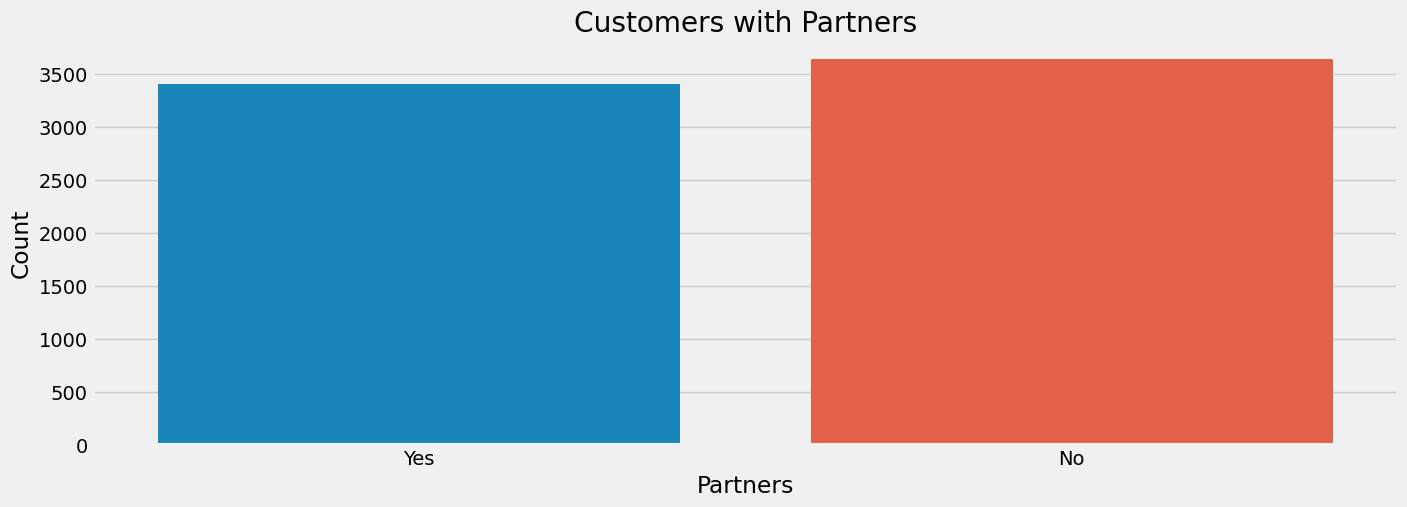

In [8]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Partner', data=customers)
plt.title("Customers with Partners")
plt.xlabel('Partners')
plt.ylabel('Count')
plt.show()

From the graph, 3641 customers have no partners whereas 3402 customers have partners.

In [175]:
# Analyze whether customers have Phone Service or not

customers["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

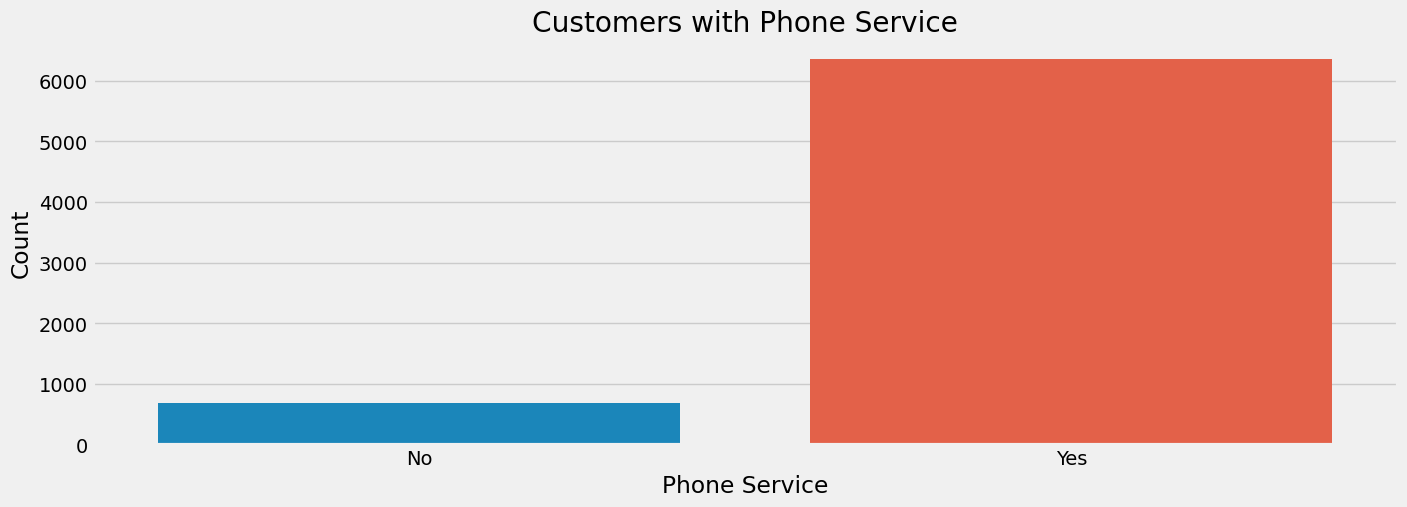

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x='PhoneService', data=customers)
plt.title("Customers with Phone Service")
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

From the plot, 6361 customers had Phone Service, whereas 682 customers had no Phone Service.

In [177]:
# Analyze customers with Multiple Lines

customers["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

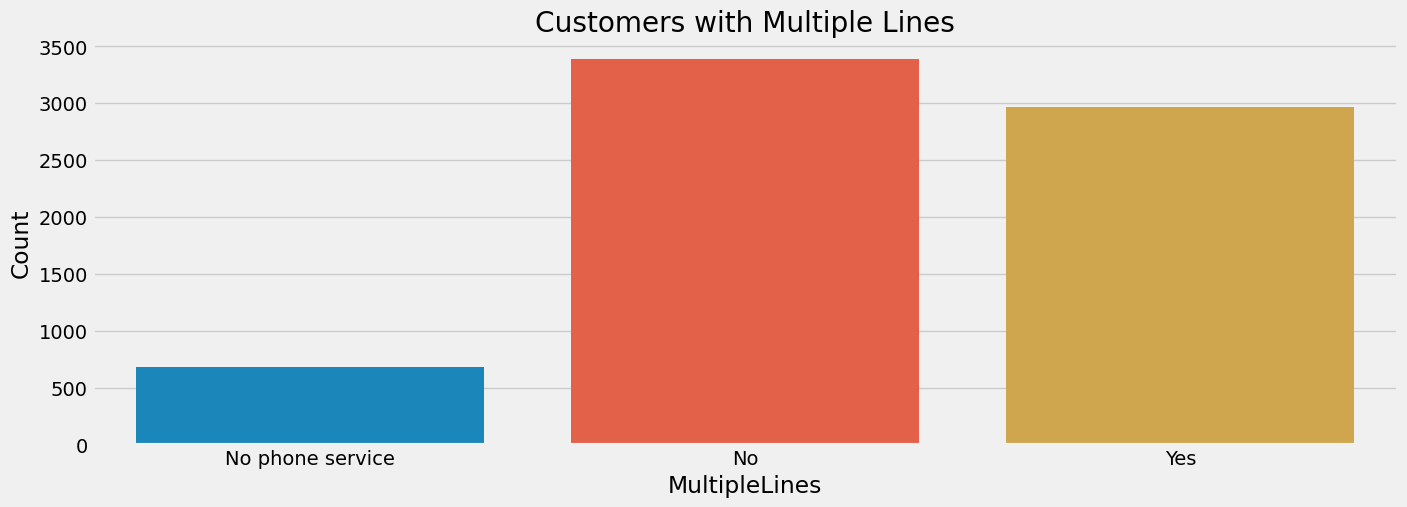

In [12]:
plt.figure(figsize=(15, 5))

sns.countplot(x='MultipleLines', data=customers)
plt.title("Customers with Multiple Lines")
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.show()

From the plot, 2971 customers had Multiple Lines, 3390 customers had single lines and 682 had no phone service at all.    

In [179]:
# Analyzing customers with Internet Service

customers["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

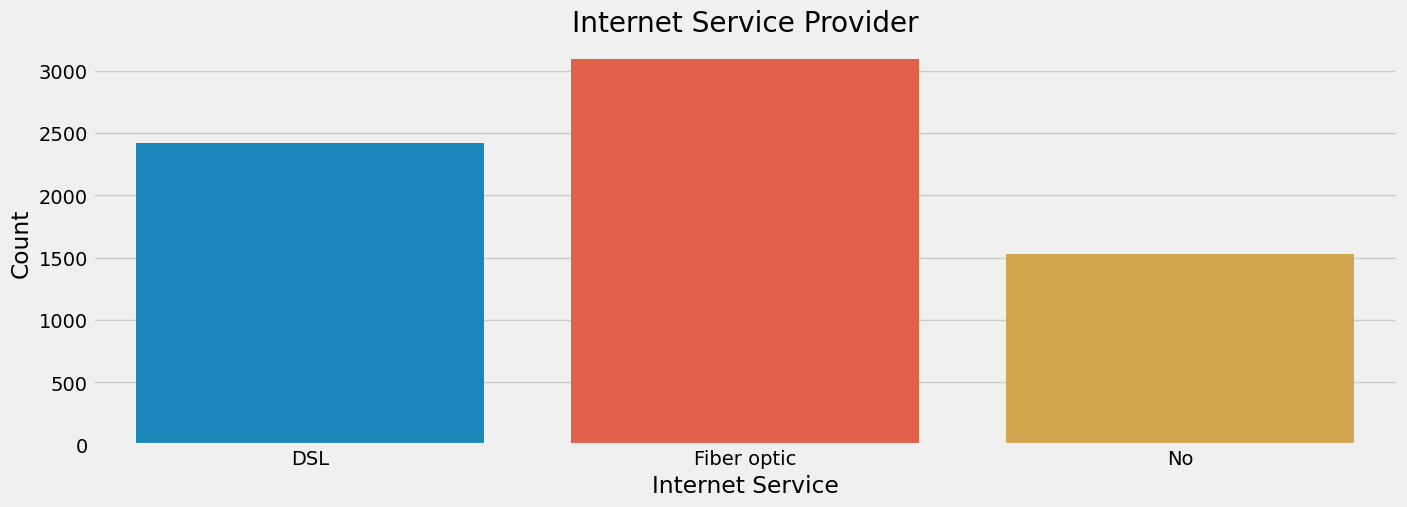

In [13]:
plt.figure(figsize=(15, 5))

sns.countplot(x='InternetService', data=customers)
plt.title("Internet Service Provider")
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The graph shows that 3096 customers used Fiber optic  as their source of internet, 2421 customers used DSL as their internet provider and 1526 had no internet service provider and plan 

In [181]:
# Analyzing whether a customers has Online Security

customers["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

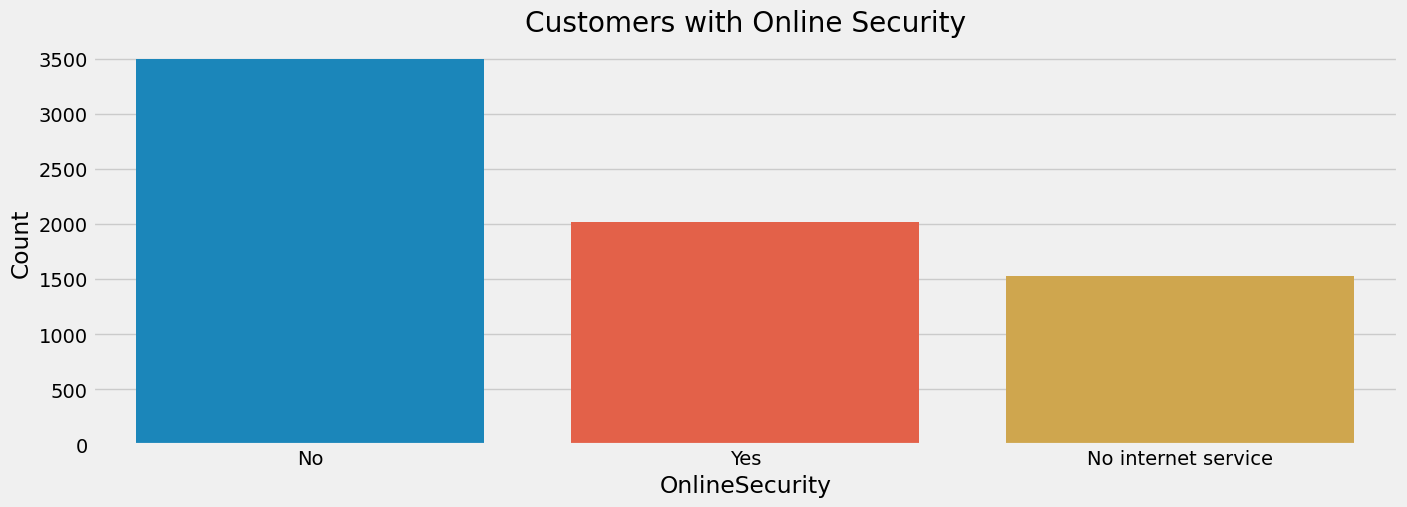

In [14]:
plt.figure(figsize=(15, 5))

sns.countplot(x='OnlineSecurity', data=customers)
plt.title("Customers with Online Security")
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.show()

The plot shoew that 2019 had online security, 3498 had no online security and 1526 had no internet service.

In [183]:
# Analyze Customers with backup

customers["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

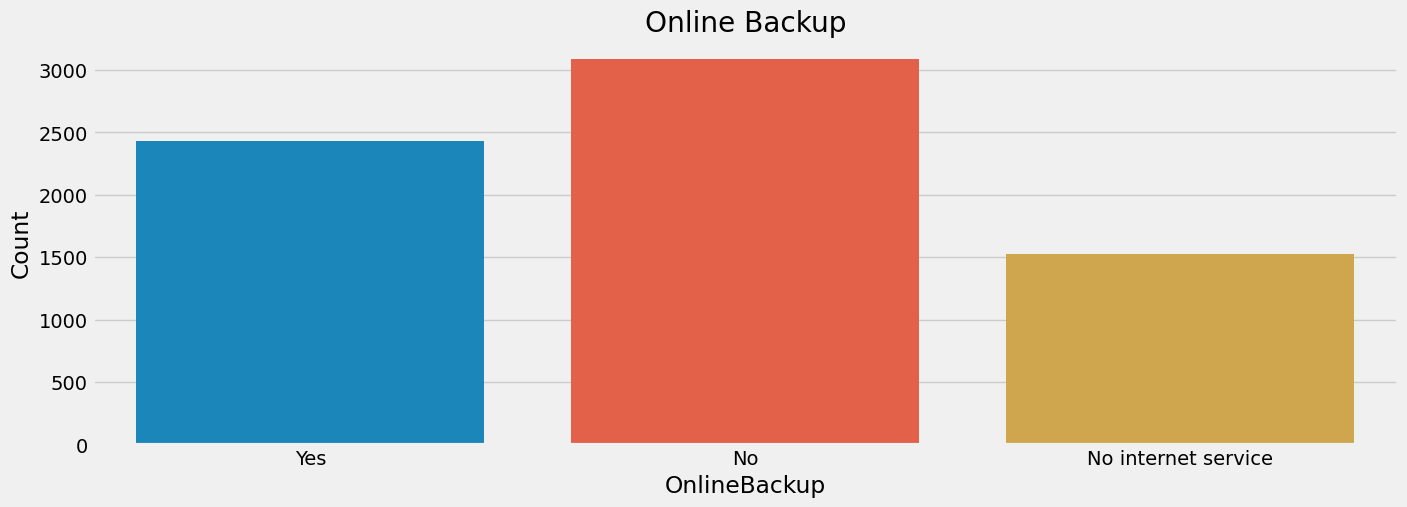

In [15]:
plt.figure(figsize=(15, 5))

sns.countplot(x='OnlineBackup', data=customers)
plt.title('Online Backup')
plt.ylabel('Count')
plt.show()

The graph shows that 3088 had no online backup,  2429 had online backup and 1526 had no internet service.   

In [185]:
# Analyze customers with Device Protection

customers["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

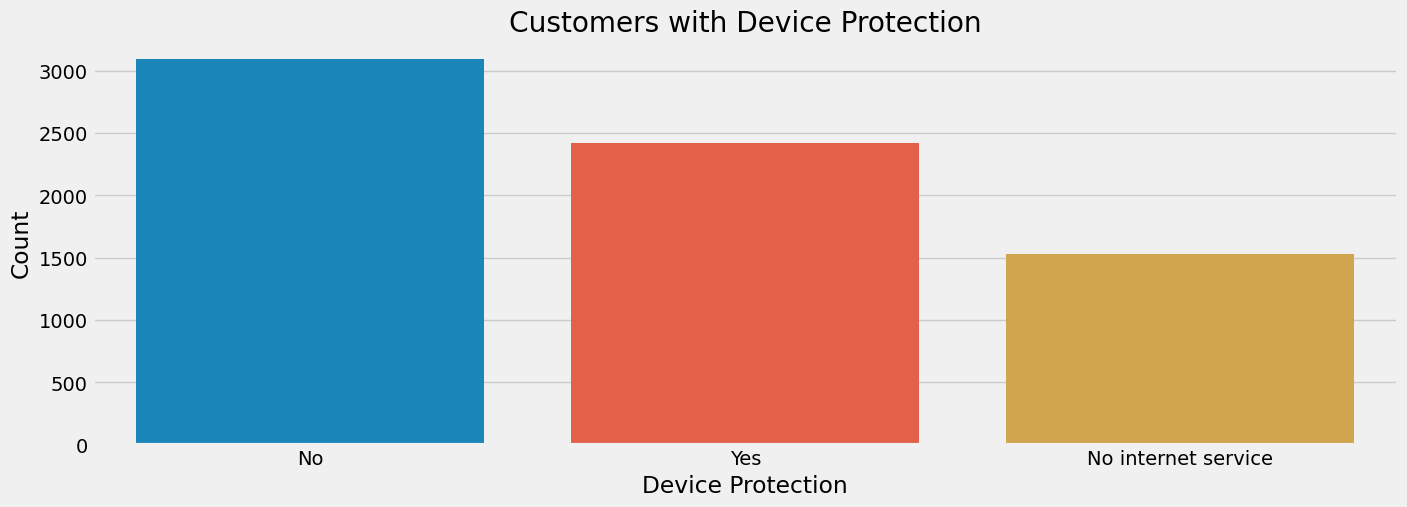

In [16]:
plt.figure(figsize=(15, 5))

sns.countplot(x='DeviceProtection', data=customers)
plt.title("Customers with Device Protection")
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()


The plot shows that 3095 customers had no device protection, 2422 had device protection and 1526 had no internet service

In [187]:
# Analyze customers with Tech Support

customers["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

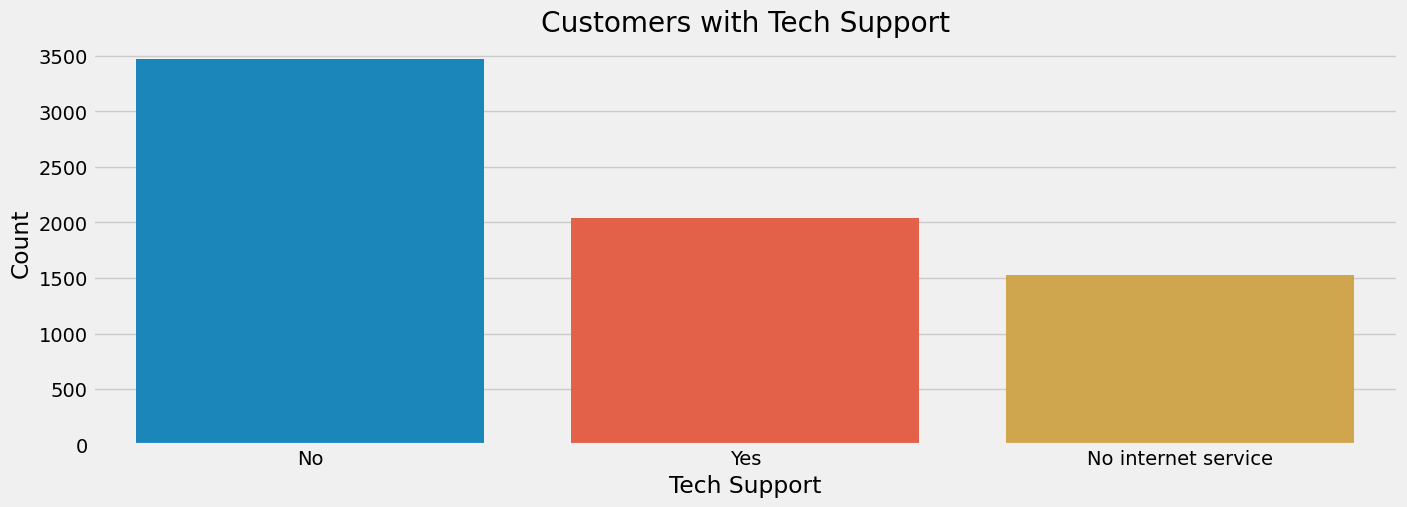

In [17]:
plt.figure(figsize=(15, 5))

sns.countplot(x='TechSupport', data=customers)
plt.title("Customers with Tech Support")
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

The plot shows that 3473 customers had no access to technical support, 2044 customers had access to technical support and 1526 had no internet service

In [189]:
# Analyze Customers with Streaming TV

customers["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

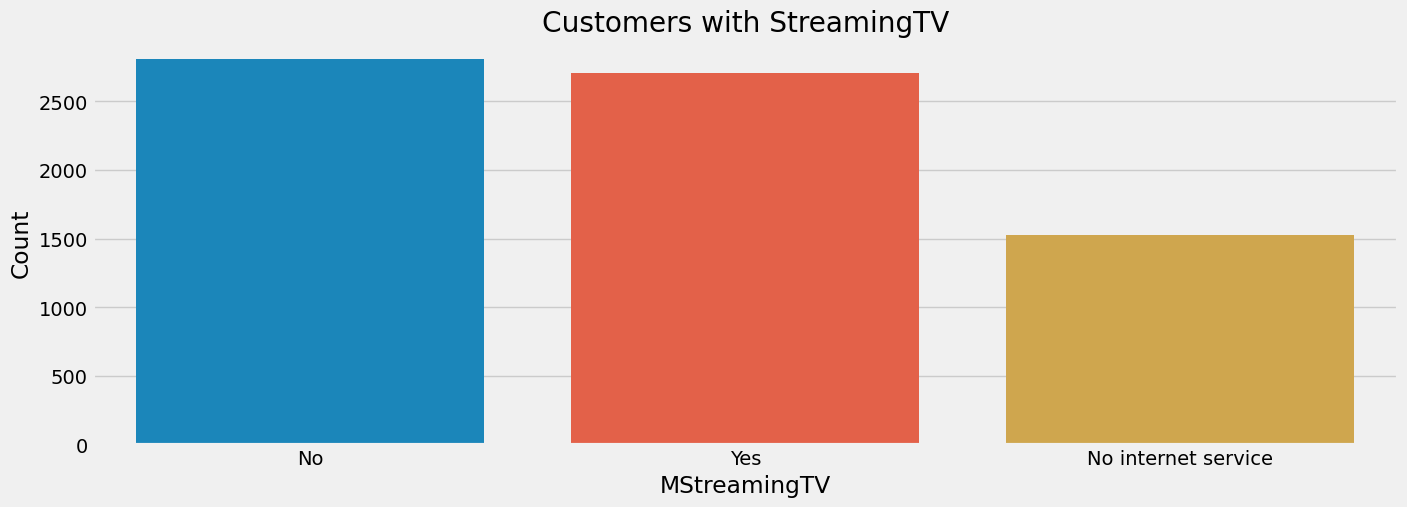

In [18]:
plt.figure(figsize=(15, 5))

sns.countplot(x='StreamingTV', data=customers)
plt.title("Customers with StreamingTV")
plt.xlabel('MStreamingTV')
plt.ylabel('Count')
plt.show()

There were 2810 customers who did not subscribe to StreamingTV, 2707 of our customers subscribed to StreamingTv and there were 1526 customers who had no internet service

In [191]:
# Analyze the Contract of customers

customers["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

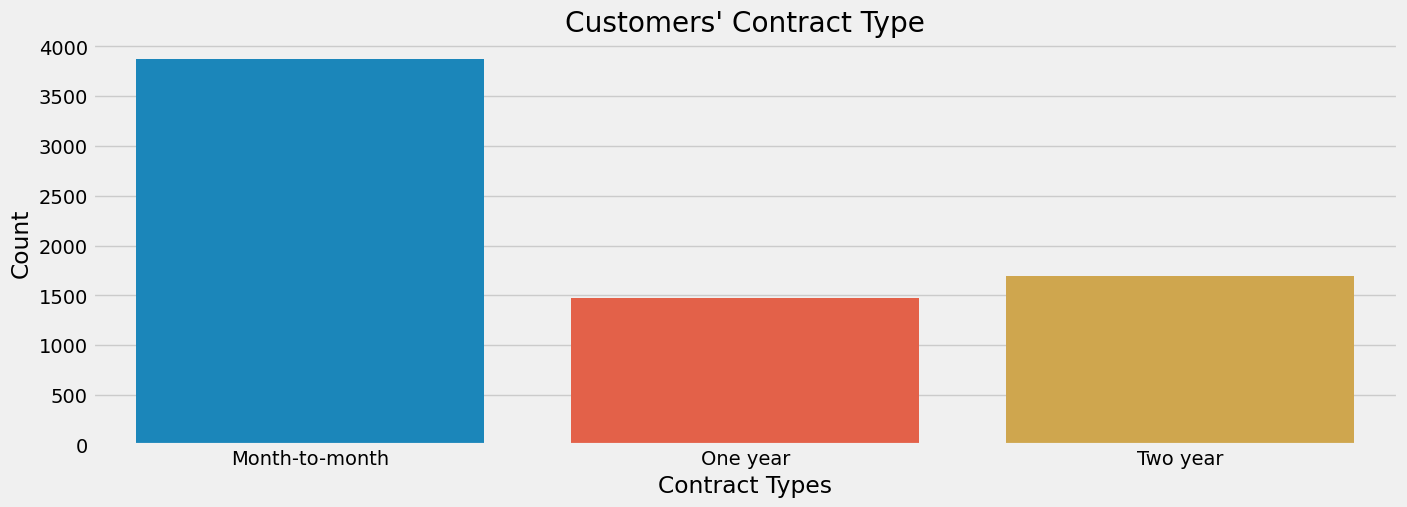

In [19]:
plt.figure(figsize=(15, 5))

sns.countplot(x='Contract', data=customers)
plt.title("Customers' Contract Type")
plt.xlabel('Contract Types')
plt.ylabel('Count')
plt.show()

The graph shows that 3875 customers subscribed to month-to-month contract, 1695 subscribed to two year contract and 1473 customers subscribed to one year contract.

In [193]:
# Analyzing the Pay Methods of Customers
customers["PaymentMethod"].value_counts()


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

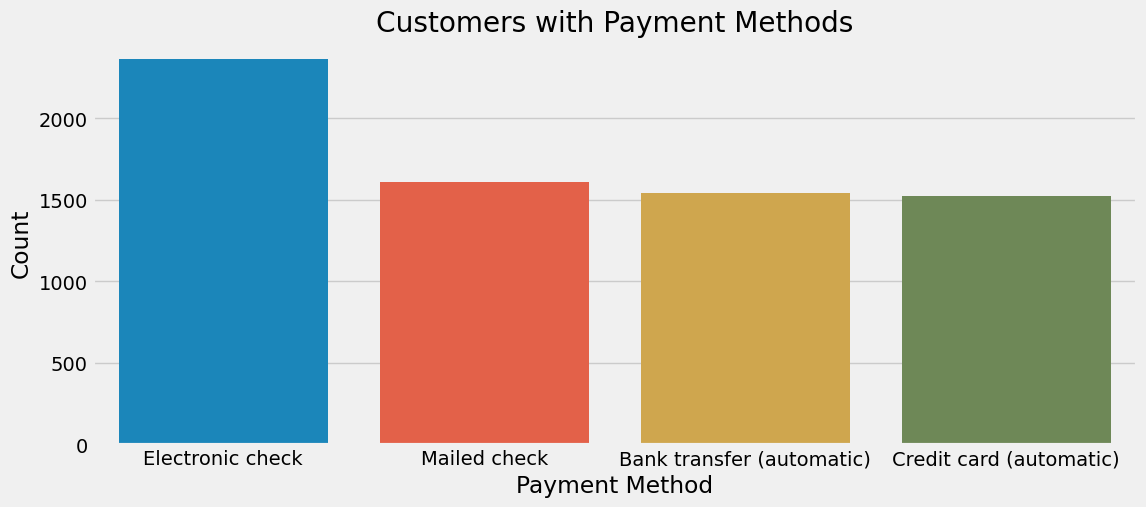

In [20]:
plt.figure(figsize=(12, 5))

sns.countplot(x='PaymentMethod', data=customers)
plt.title("Customers with Payment Methods")
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


2365 customers paid through Electronic check, 1612 paid through Mailed Check, 1544 paid through Bank transfer and 1522 paid through Credit cards

### BIVARIATE ANALYSIS

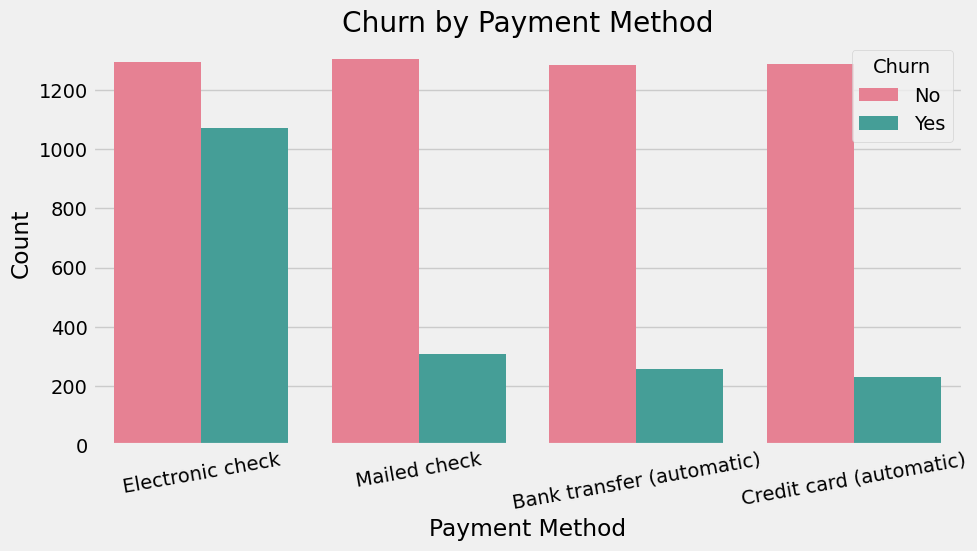

In [21]:
# Analyzing Churn by Payment Methods

plt.figure(figsize=(10,5))

sns.countplot(x='PaymentMethod', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

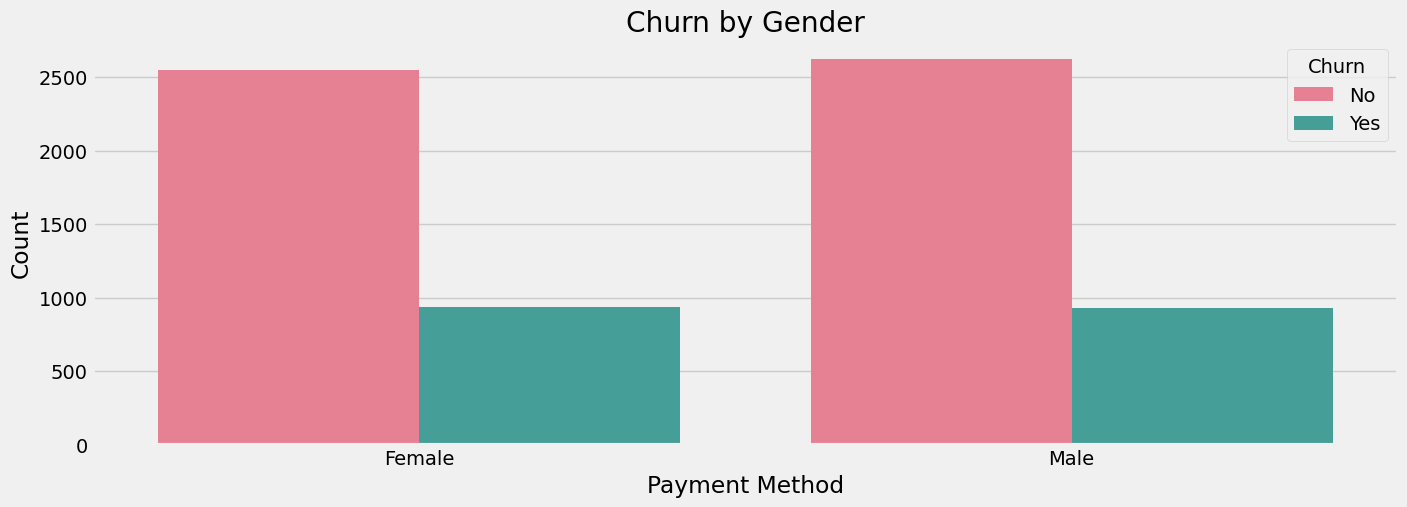

In [22]:
# Analyze gender by churn

plt.figure(figsize=(15, 5))

sns.countplot(x='gender', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
#plt.xticks(rotation=10)

plt.show()

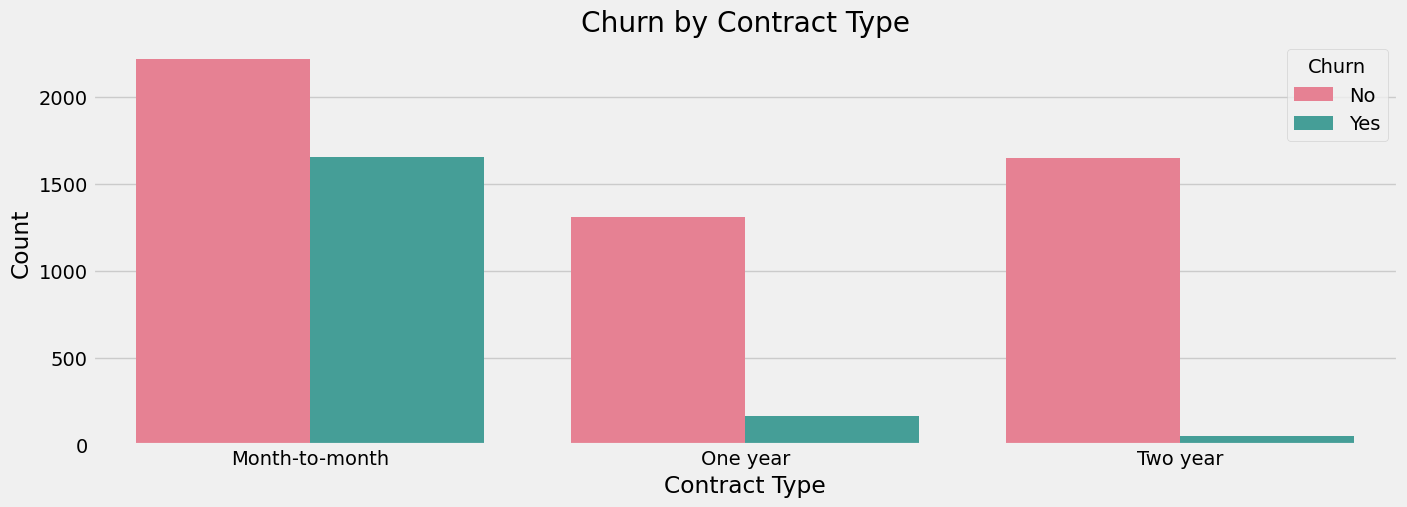

In [23]:
# Analyze Churn by contrat type
plt.figure(figsize=(15, 5))

sns.countplot(x='Contract', hue='Churn', data=customers, palette='husl')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

plt.show()

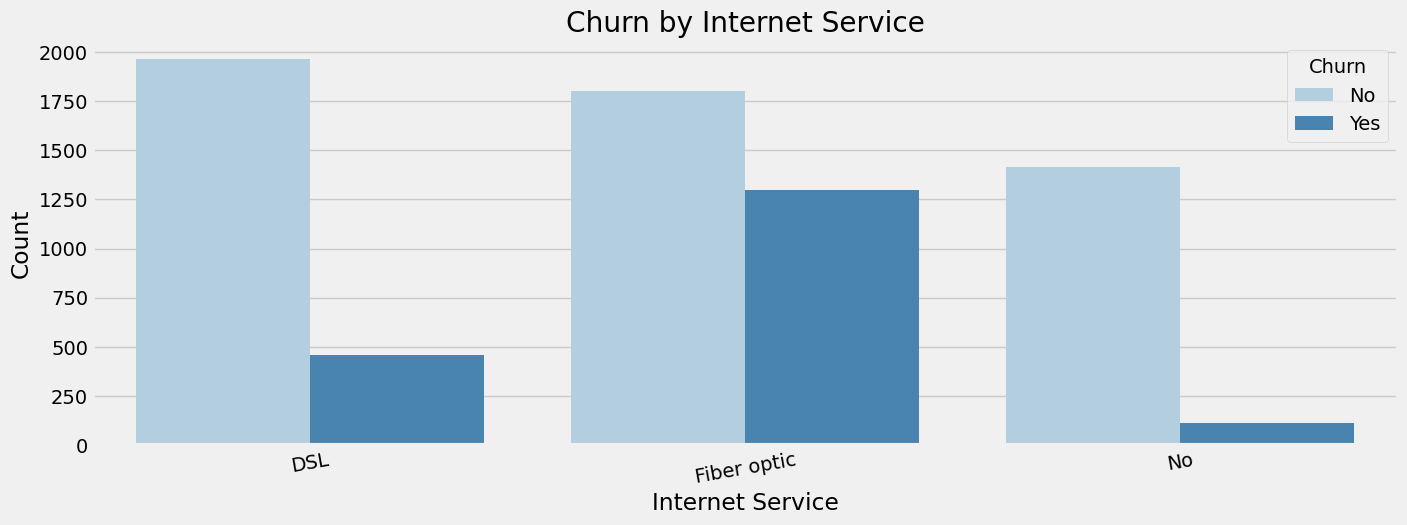

In [24]:
# Churn by Internet Service

plt.figure(figsize=(15, 5))

sns.countplot(x='InternetService', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

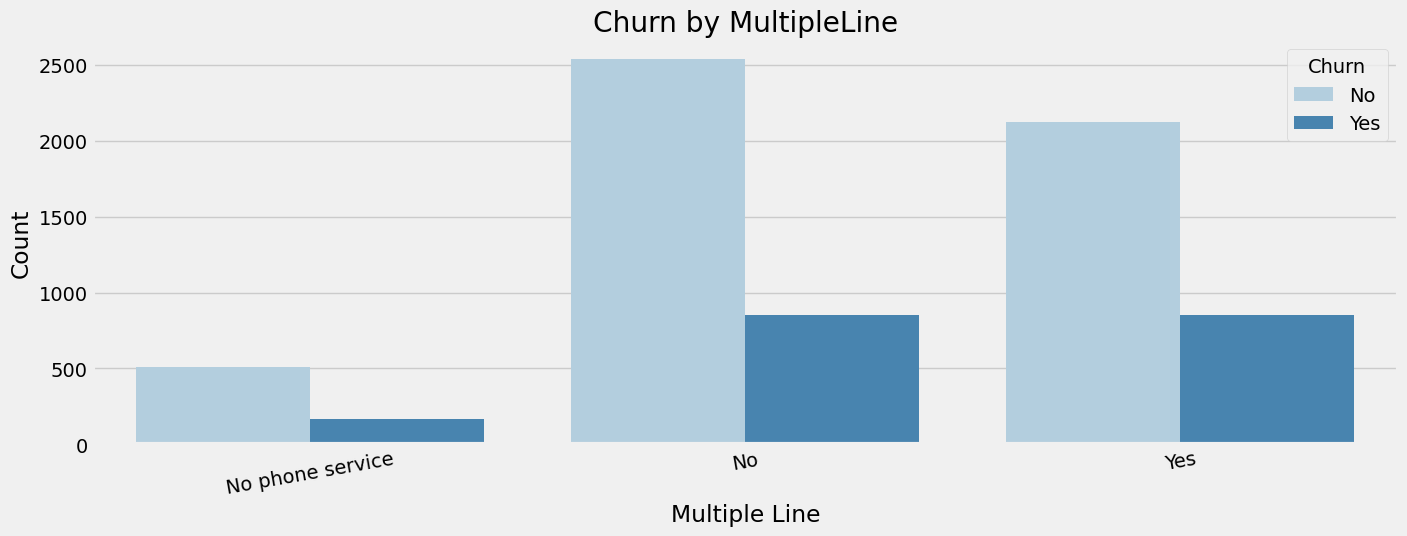

In [25]:
# Churn by Multiple Lines

plt.figure(figsize=(15, 5))

sns.countplot(x='MultipleLines', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by MultipleLine')
plt.xlabel('Multiple Line')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

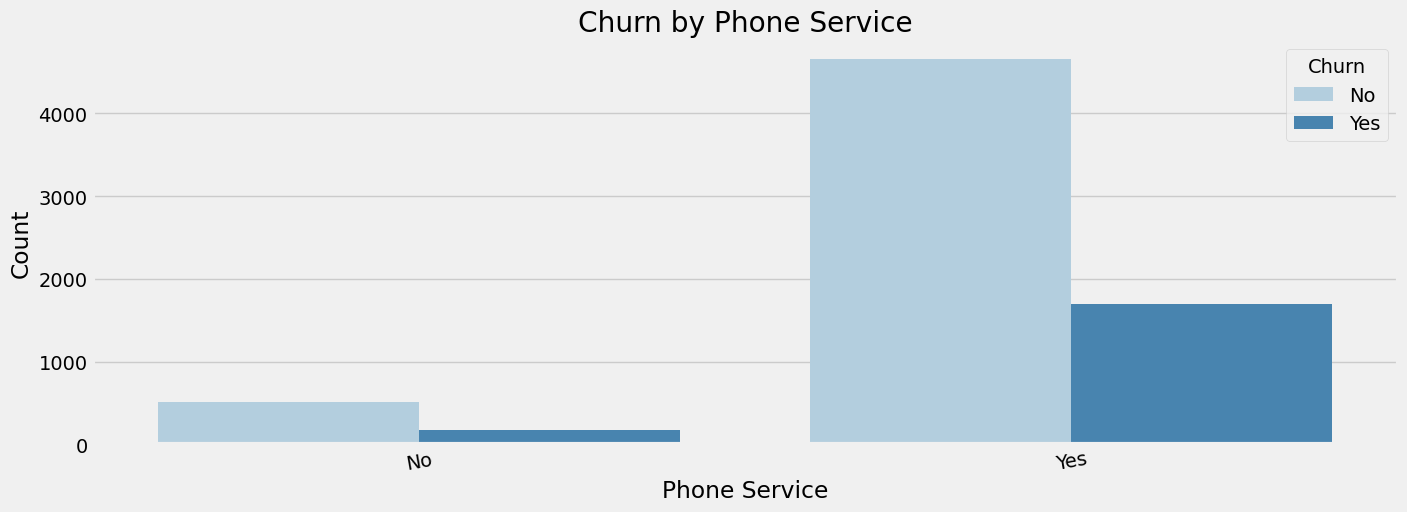

In [26]:
# Churn by Phone Service

plt.figure(figsize=(15, 5))

sns.countplot(x='PhoneService', hue='Churn', data=customers, palette='Blues')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.xticks(rotation=10)

plt.show()

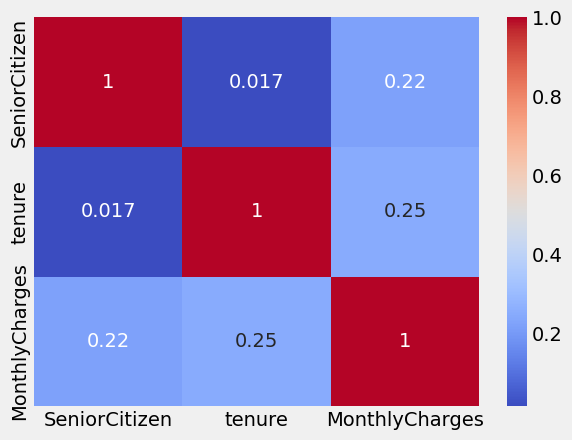

In [27]:
# Create correlation matrix
customers_copy = customers.drop("customerID", axis=1)


corr = customers_copy.corr(numeric_only=True)
corr = customers_copy.corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');

### BUSINESS QUESTIONS

### Feature Processing & Engineering

In [202]:
# Replace blank spaces with NaN values
customers['TotalCharges'] = customers['TotalCharges'].replace(' ', np.nan)

# Fill NaN values with a default value (e.g. 0)
customers['TotalCharges'] = customers['TotalCharges'].fillna(0)

# Convert column to float
customers['TotalCharges'] = customers['TotalCharges'].astype(float)

In [203]:
## feature creations

customers['TenureInYears'] = customers['tenure'] // 12
customers['TotalCharges'] = customers['TotalCharges'].astype(float)
customers['ElectronicPayment'] = customers['PaymentMethod'].apply(lambda x: 1 if 'Electronic' in x else 0)
customers['num_services'] = customers[['PhoneService', 'InternetService']].sum(axis=1)
customers['has_fiber_optic'] = np.where(customers['InternetService'] == 'Fiber optic', 1, 0)
customers['is_month_to_month'] = (customers['Contract'] == 'Month-to-month')

In [204]:
# check sample of data

customers.sample(5, random_state=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInYears,ElectronicPayment,num_services,has_fiber_optic,is_month_to_month
3381,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No,3,0,YesDSL,0,False
6180,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No,5,0,YesFiber optic,1,False
4829,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No,1,0,YesDSL,0,True
3737,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes,0,0,YesDSL,0,True
4249,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No,0,0,YesDSL,0,False


In [205]:
# Drop column that will not be required for model building

customers = customers.drop("customerID", axis=1)

### Dataset Splitting

In [206]:
# Create target feature and predicting feature
y = customers['Churn']
X = customers.drop('Churn', axis=1)

In [207]:
# Split data into test and train data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [208]:
### checking for missing figure

X_train.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
TenureInYears        0
ElectronicPayment    0
num_services         0
has_fiber_optic      0
is_month_to_month    0
dtype: int64

### New Features Creation

In [209]:
X_train['total_charges_per_month'] = X_train['TotalCharges'] / X_train['tenure']
X_test['total_charges_per_month'] = X_test['TotalCharges'] / X_test['tenure']

### Features Encoding

In [210]:

# Define the categorical columns to encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'num_services','is_month_to_month']

# Create an instance of the BinaryEncoder
encoder = ce.BinaryEncoder(cols=categorical_cols)

# Fit and transform the encoder on X_train
X_train_encoded = encoder.fit_transform(X_train)
# Encode the categorical columns in X_test
X_test_encoded = encoder.transform(X_test)

# Display the encoded data
print(X_train_encoded.head())


      gender_0  gender_1  SeniorCitizen  Partner_0  Partner_1  Dependents_0  \
3738         0         1              0          0          1             0   
3151         0         1              0          1          0             1   
4860         0         1              0          1          0             1   
3867         1         0              0          1          0             0   
3810         0         1              0          1          0             1   

      Dependents_1  tenure  PhoneService_0  PhoneService_1  MultipleLines_0  \
3738             1      35               0               1                0   
3151             0      15               1               0                1   
4860             0      13               0               1                0   
3867             1      26               1               0                1   
3810             0       1               1               0                1   

      MultipleLines_1  InternetService_0  Internet

In [211]:
X_train = X_train_encoded
X_test = X_test_encoded

In [212]:
X_train['total_charges_per_month'] = X_train['total_charges_per_month'].fillna(0)
X_test['total_charges_per_month'] = X_test['total_charges_per_month'].fillna(0)


### Features Scaling

In [213]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit on the training data
scaler.fit(X_train)

# Apply the scaler transform to both the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_train = X_train_imputed
X_test = X_test_imputed


### Train set Balancing

In [214]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


## Metrics we would use for assesments

1. Confusion matrix: This presents a table that compares the predicted values with the actual values to determine the true and false predictions.

2. Accuracy score: This measures the overall accuracy of the model for both the training and testing datasets.

3. Precision-Recall Curve: This illustrates the diagnostic ability of the model by examining false positive rate (FPR) and false negative rate (FNR) at different thresholds of class predictions. This metric is suitable for datasets with imbalanced classes as it is not reliant on the number of true negatives.

4. F1 Score: This metric calculates the harmonic mean of precision and recall to determine the balance between both metrics.

## Building and Training Machine Learning Models

### K Nearest Neighbors

In [215]:
# Define the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training dataset
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)


[[919 116]
 [204 170]]
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1035
         Yes       0.59      0.45      0.52       374

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



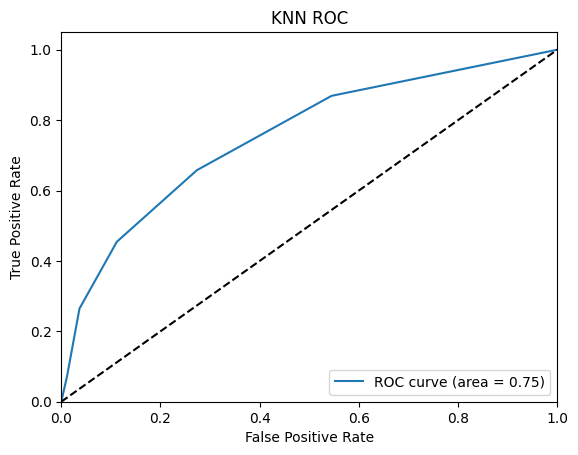

Accuracy score: 0.772888573456352


In [216]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)


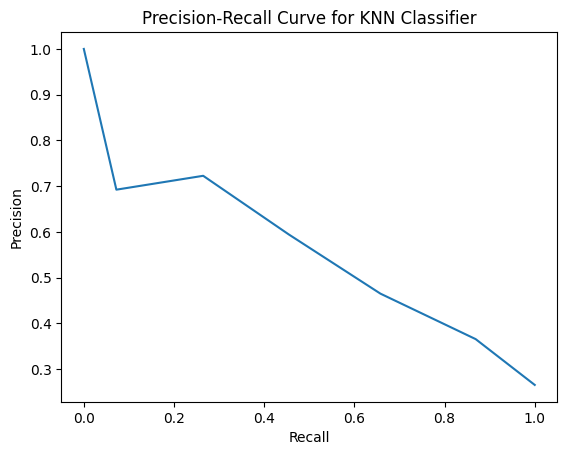

In [217]:
# Get the predicted probabilities for the positive class
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label='Yes')

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN Classifier')
plt.show()


### KNN METRICS EVALUATION

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision score
precision = precision_score(y_test, y_pred, pos_label='Yes')

# Calculate the recall score
recall = recall_score(y_test, y_pred, pos_label='Yes')

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, pos_label='No')


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.77
Precision: 0.59
Recall: 0.45
F1-score: 0.85


## Logistics Regression Model

In [219]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [220]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

[[927 108]
 [163 211]]
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1035
         Yes       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



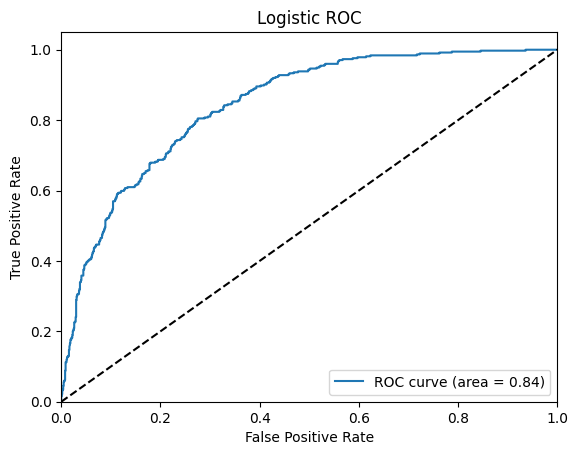

Accuracy score: 0.8076650106458482
Average precision score: 0.65


In [221]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred_logreg)
print(cr)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob[:, 1], pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_logreg_prob[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic ROC')
plt.legend(loc="lower right")
plt.show()


# Accuracy score
acc = accuracy_score(y_test, y_pred_logreg)
print('Accuracy score:', acc)

#Average Precision score
average_precision = average_precision_score(y_test, y_pred_logreg_prob[:, 1], pos_label="Yes")
print("Average precision score: {:.2f}".format(average_precision))



In [222]:
#plotting precission

### GRADIENT BOOSTING MACHINES (GBM)

In [223]:
# Initialize the GBM classifier with default hyperparameters
gbm = GradientBoostingClassifier()
# Fit the GBM model on the training dataset
gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [224]:
# Make predictions on the test dataset
y_pred = gbm.predict(X_test)

In [225]:
# Convert string labels to integer values
label_mapping = {'No': 0, 'Yes': 1}
y_pred_int = [label_mapping[label] for label in y_pred]

# Now you can compare y_true and y_pred_int

# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.8034066713981547


[[939  96]
 [181 193]]
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1035
         Yes       0.67      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



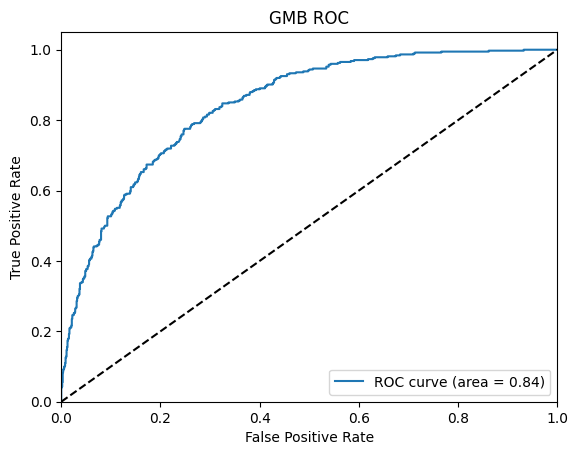

Accuracy score: 0.8034066713981547


In [226]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = gbm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GMB ROC')
plt.legend(loc="lower right")
plt.show()

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

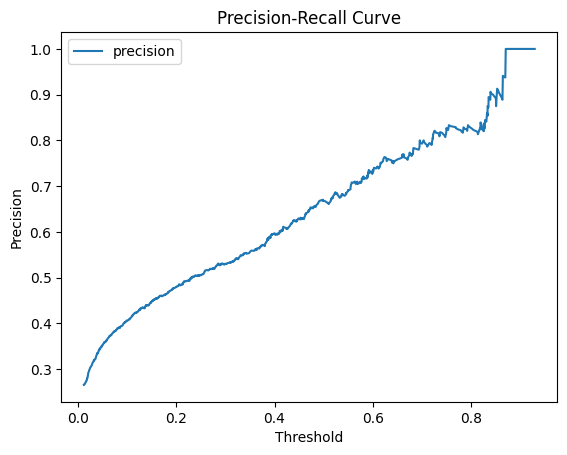

In [227]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities of the positive class
y_prob = gbm.predict_proba(X_test)[:, 1]

# Convert the target variable to binary labels
y_test_bin = (y_test == "Yes").astype(int)

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_prob)

# Plot the precision score as a function of the threshold
plt.plot(thresholds, precision[:-1], label="precision")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


### GBM Model evaluation Results

In [228]:
# Calculate the accuracy of the GBM classifier
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the GBM classifier
precision = precision_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the recall of the GBM classifier
recall = recall_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the f1-score of the GBM classifier
f1_score = f1_score(y_test, y_pred, labels=['Yes'], pos_label='Yes', average='weighted')
# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 0.80
Precision: 0.67
Recall: 0.52
F1-score: 0.85


### NEURAL NETWORKS

In [229]:
# Define the MLP classifier with 1 hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Fit the MLP model on the training dataset
mlp.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = mlp.predict(X_test)

[[890 145]
 [153 221]]
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1035
         Yes       0.60      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



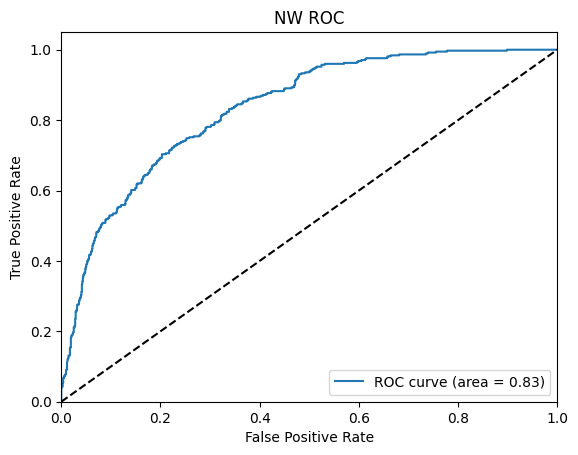

In [230]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# ROC Curve
y_pred_prob = mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Yes')
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NW ROC')
plt.legend(loc="lower right")
plt.show()

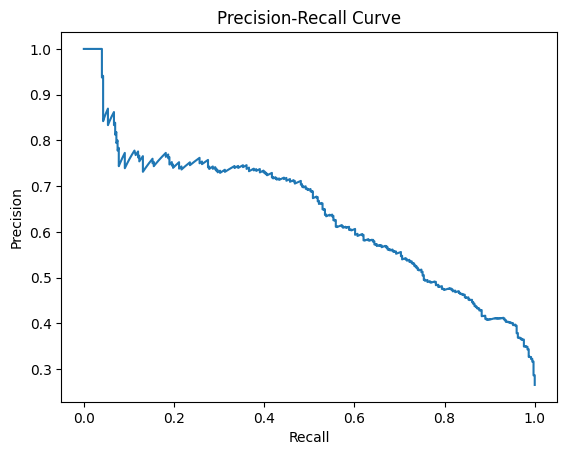

In [231]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Yes' as 1 and 'No' as 0 in y_test
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Predict probabilities and obtain positive class probabilities
y_prob = mlp.predict_proba(X_test)[:, 1]

# Compute precision, recall and threshold values
precision, recall, thresholds = precision_recall_curve(y_test_encoded, y_prob)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



### Calculating the Evaluation metrics for Neural Networks

In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the MLP classifier
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the MLP classifier
precision = precision_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the recall of the MLP classifier
recall = recall_score(y_test, y_pred, labels=['Yes'], average='weighted')

# Calculate the f1-score of the MLP classifier
f1 = f1_score(y_test, y_pred, labels=['Yes'], pos_label='Yes', average='weighted')

# Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7885024840312278
Precision: 0.6038251366120219
Recall: 0.5909090909090909
F1-score: 0.5972972972972973


### Comparing Model scores

In [233]:
# Create a dictionary with the evaluation metrics
data = {'KNN': [0.77, 0.59, 0.45, 0.85],
        'Logistic Regression': [0.81, 0.66, 0.56, 0.87],
        'Gradient Boosting Machines': [0.80, 0.67, 0.52, 0.85],
        'Neural Networks': [0.80,0.67, 0.48, 0.56]}

# Create a DataFrame from the dictionary
customers = pd.DataFrame(data, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Sort the DataFrame in ascending order
customers_sorted = customers.T.sort_values(by='F1-score', ascending=True)

print(customers_sorted)


                            Accuracy  Precision  Recall  F1-score
Neural Networks                 0.80       0.67    0.48      0.56
KNN                             0.77       0.59    0.45      0.85
Gradient Boosting Machines      0.80       0.67    0.52      0.85
Logistic Regression             0.81       0.66    0.56      0.87


### Conclusion Based on the four models choosen

For accuracy, Logistic Regression performs the best with a score of 0.81.
For precision, Neural Networks, Gradient Boosting Machines, and Logistic Regression have similar scores around 0.66-0.67.
For recall, Logistic Regression has the highest score of 0.56.
For the F1-score, Logistic Regression performs the best with a score of 0.87.
Considering the overall performance across these metrics, Logistic Regression is the most balanced

## Hyperparameter Tunning for my Best Model

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create an instance of Logistic Regression
logistic_regression = LogisticRegression()

# Define the hyperparameters and their possible values
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(logistic_regression, parameters, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Test Accuracy: 0.8005677785663591


## Building the Interpreter for my Best Model Logistic Regression

In [244]:


class LogisticRegressionInterpreter:
    def __init__(self):
        self.model = LogisticRegression()
        self.coefficients = None
        self.intercept = None

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        self.coefficients = self.model.coef_
        self.intercept = self.model.intercept_

    def predict(self, X_test):
        return self.model.predict(X_test)

    def interpret(self, feature_names):
        if self.coefficients is None or self.intercept is None:
            raise Exception("Model is not trained yet.")

        for feature, coefficient in zip(feature_names, self.coefficients[0]):
            print(f"{feature}: {coefficient}")

        print("Intercept:", self.intercept[0])


In [252]:
#creating and instance for a logistic regression
interpreter = LogisticRegressionInterpreter()
#Fiting the logistic regression model on the training data
interpreter.train(X_train, y_train)
#Predicting the target variable for the test data
y_pred = interpreter.predict(X_test)

In [238]:
#using the interpreter on the featured names 
interpreter.interpret(['gender','SeniorCitizen','Partner',	'Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])


gender: -0.04756916596441864
SeniorCitizen: -0.017372760274432474
Partner: 0.15511021057462107
Dependents: -0.030964015173187125
tenure: -0.0339779110630372
PhoneService: -0.15384947382491454
MultipleLines: 0.08890754759280671
InternetService: -0.06649150026954014
OnlineSecurity: -0.1526135840645733
DeviceProtection: 0.08767165781950373
TechSupport: -0.1526135840645733
StreamingTV: 0.22567020861452716
StreamingMovies: 0.09907075119753213
Contract: -0.23234942679440362
PaperlessBilling: -0.3176370815250714
PaymentMethod: 0.18435840586497682
MonthlyCharges: -0.175209716255411
TotalCharges: 0.0419310406023068
Intercept: -0.06534620607998345


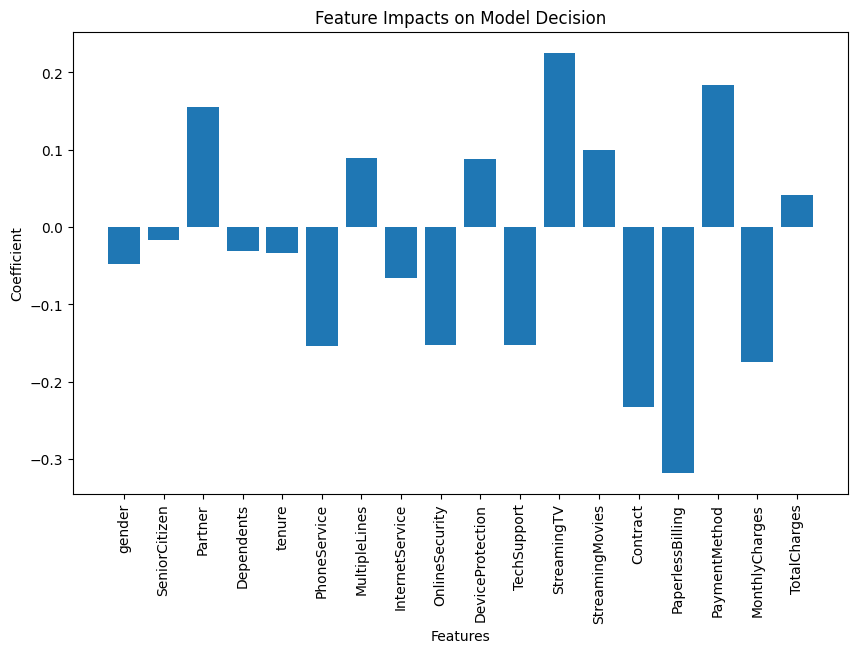

In [243]:
# Coefficients and feature names
coefficients = [-0.04756916596441864, -0.017372760274432474, 0.15511021057462107, -0.030964015173187125, -0.0339779110630372, -0.15384947382491454, 0.08890754759280671, -0.06649150026954014, -0.1526135840645733, 0.08767165781950373, -0.1526135840645733, 0.22567020861452716, 0.09907075119753213, -0.23234942679440362, -0.3176370815250714, 0.18435840586497682, -0.175209716255411, 0.0419310406023068]
feature_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_names, coefficients)
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient')
ax.set_title('Feature Impacts on Model Decision')
plt.xticks(rotation='vertical')
plt.show()


### Insights on the interpreter

Features with positive coefficients:

Partner: A positive coefficient suggests that having a partner increases the likelihood of the predicted outcome.
MultipleLines: A positive coefficient indicates that having multiple phone lines increases the likelihood of the predicted outcome.
DeviceProtection: A positive coefficient suggests that having device protection increases the likelihood of the predicted outcome.
StreamingTV: A positive coefficient indicates that having streaming TV increases the likelihood of the predicted outcome.
StreamingMovies: A positive coefficient suggests that having streaming movies increases the likelihood of the predicted outcome.
PaymentMethod: A positive coefficient indicates that certain payment methods increase the likelihood of the predicted outcome.
Features with negative coefficients:

Gender: A negative coefficient suggests that being female decreases the likelihood of the predicted outcome.
SeniorCitizen: A negative coefficient indicates that being a senior citizen decreases the likelihood of the predicted outcome.
Dependents: A negative coefficient suggests that having dependents decreases the likelihood of the predicted outcome.
Tenure: A negative coefficient indicates that a longer tenure decreases the likelihood of the predicted outcome.
PhoneService: A negative coefficient suggests that having phone service decreases the likelihood of the predicted outcome.
InternetService: A negative coefficient indicates that having internet service decreases the likelihood of the predicted outcome.
OnlineSecurity: A negative coefficient suggests that having online security decreases the likelihood of the predicted outcome.
TechSupport: A negative coefficient indicates that having tech support decreases the likelihood of the predicted outcome.
Contract: A negative coefficient suggests that having a longer contract duration decreases the likelihood of the predicted outcome.
PaperlessBilling: A negative coefficient indicates that using paperless billing decreases the likelihood of the predicted outcome.
MonthlyCharges: A negative coefficient suggests that higher monthly charges decrease the likelihood of the predicted outcome.
TotalCharges: A positive coefficient indicates that higher total charges increase the likelihood of the predicted outcome.
The intercept term (-0.06534620607998345) represents the baseline or inherent probability of the predicted outcome when all other features are zero or not considered.

